# Introduction à l'apprentissage automatique - TP4 exercice 2

### Classification par perceptron multicouche, données réelles

<br>


Commencez par lire la [documentation](http://scikit-learn.org/stable/modules/neural_networks_supervised.html) et faites le lien avec le cours.

On utilisera la fonction `MLPClassifier` dont la documentation est [ici](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html).

<br>

Après avoir chargé les bibliothèques utiles, on reprend l'exemple `breast_cancer` (voit [TP3, exercice2](https://members.loria.fr/FSur/enseignement/apprauto/TP3_ex2_sujet.html)), pour lequel on gardera 30\% des données pour former une base de test.

In [1]:
from sklearn import datasets, model_selection, neural_network, model_selection, preprocessing, neighbors, naive_bayes, linear_model
import numpy as np
import matplotlib.pyplot as plt

# pour ignorer les "warnings" concernant les modifications futures
# (pour régression logistique et perceptron)
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline 

In [2]:
dataset = datasets.load_breast_cancer()
X_dataset = dataset.data
y_dataset = dataset.target
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_dataset,y_dataset,test_size=.7)

print(X_train)
print(X_test)

[[1.940e+01 1.818e+01 1.272e+02 ... 2.252e-01 3.590e-01 7.787e-02]
 [1.108e+01 1.883e+01 7.330e+01 ... 2.524e-01 4.154e-01 1.403e-01]
 [1.176e+01 2.160e+01 7.472e+01 ... 3.715e-02 2.433e-01 6.563e-02]
 ...
 [1.294e+01 1.617e+01 8.318e+01 ... 8.388e-02 3.297e-01 7.834e-02]
 [1.481e+01 1.470e+01 9.466e+01 ... 7.955e-02 2.334e-01 6.142e-02]
 [1.366e+01 1.913e+01 8.946e+01 ... 1.407e-01 2.744e-01 8.839e-02]]
[[1.174e+01 1.402e+01 7.424e+01 ... 8.290e-02 3.101e-01 6.688e-02]
 [1.256e+01 1.907e+01 8.192e+01 ... 9.265e-02 2.121e-01 7.188e-02]
 [1.287e+01 1.621e+01 8.238e+01 ... 5.780e-02 3.604e-01 7.062e-02]
 ...
 [1.308e+01 1.571e+01 8.563e+01 ... 7.283e-02 3.184e-01 8.183e-02]
 [1.189e+01 1.835e+01 7.732e+01 ... 1.138e-01 3.397e-01 8.365e-02]
 [1.296e+01 1.829e+01 8.418e+01 ... 6.608e-02 3.207e-01 7.247e-02]]


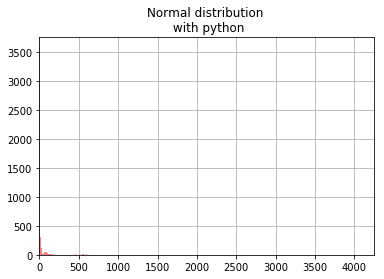

In [11]:
hist, bin_edges = np.histogram(X_train, bins=500)

plt.bar(bin_edges[:-1], hist, width=bin_edges[1]-bin_edges[0], color='red', alpha=0.5)

plt.grid()
plt.title('Normal distribution \n with python')
plt.xlim(0,200)

plt.show()
plt.close()



On constate que dans ce jeu de données, les attributs présentent une forte variabilité: certains fluctuent autour de $10$, d'autres autour de $10^{-2}$ par exemple. Ceci peut poser problème pour l'estimation des paramètres des algorithmes, et particulièrement pour ceux des réseaux de neurones. `sklearn` dispose de [fonctions standardisant les données](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

Par exemple:
```python
X_train_n = preprocessing.StandardScaler().fit_transform(X_train)
X_test_n = preprocessing.StandardScaler().fit(X_train).transform(X_test)
```
estime moyenne et écart-type de chaque attribut sur l'ensemble d'apprentissage (`X_train`), centre et réduit chaque attribut selon ces paramètres, puis crée `X_train_n` et `X_test_n`, les ensembles d'apprentissage et de test "normalisés". Ici, on normalise la base de test avec les paramètres estimés sur la base d'apprentissage, car la base de test n'est habituellement pas disponible au moment de l'apprentissage.

<br>

Normalisez les bases d'apprentissage et de test, et observez l'effet de la normalisation sur les valeurs des attributs.

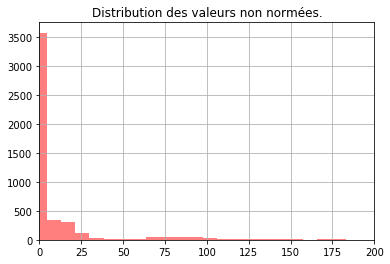

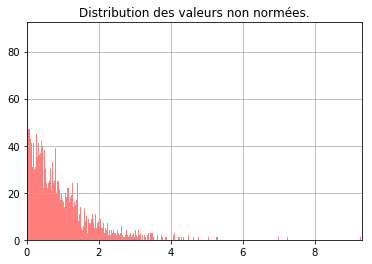

In [12]:
# votre code ici
hist, bin_edges = np.histogram(X_train, bins=500)

plt.bar(bin_edges[:-1], hist, width=bin_edges[1]-bin_edges[0], color='red', alpha=0.5)

plt.grid()
plt.title('Distribution des valeurs non normées.')
plt.xlim(0,200)

plt.show()
plt.close()

X_train_n = preprocessing.StandardScaler().fit_transform(X_train)

hist, bin_edges = np.histogram(X_train_n, bins=500)

plt.bar(bin_edges[:-1], hist, width=bin_edges[1]-bin_edges[0], color='red', alpha=0.5)

plt.grid()
plt.title('Distribution des valeurs non normées.')
plt.xlim(0,np.amax(X_train_n))

plt.show()
plt.close()

In [ ]:
# votre code ici
MLP=neural_network.MLPClassifier(hidden_layer_sizes=(15,), alpha=0.0,solver='lbfgs')


Si les paramètres d'un réseau de neurones (les poids) sont "appris", les hyperparamètres doivent être fixés par l'utilisateur. Les hyperparamètres sont le nombre de neurones dans la couche cachée, le paramètre de régularisation `alpha`, le nombre maximum d'itérations `max_iter` (c'est bien un paramètre car il permet un _early stopping_ évitant le surapprentissage), la fonction d'activation...

`sklearn` permet de faire une _grid search_: une validation croisée (par défaut à 3 plis) est effectuée pour chaque classifieur correspondant à toutes les combinaisons de valeurs des hyperparamètres. Le jeu de paramètres fournissant le meilleur score est ensuite sélectionné. Attention, le temps de calcul est potentiellement long (quelques dizaines de secondes). C'est ce que réalise le code de la cellule suivante.

In [ ]:
parameters = {'solver': ['lbfgs'], 'max_iter': [500,1000,1500], 'alpha': 10.0 ** -np.arange(1, 5), 'hidden_layer_sizes':np.arange(5, 15),'activation': ['relu','tanh']}
clf_grid = model_selection.GridSearchCV(neural_network.MLPClassifier(), parameters, n_jobs=-1)  
%time clf_grid.fit(X_dataset,y_dataset)
print("Meileur score pour dataset: %0.4f" % clf_grid.best_score_)
print("Avec les paramètres:")
print(clf_grid.best_params_)

print()
%time clf_grid.fit(X_dataset_n,y_dataset)
print("Meileur score pour dataset normalisé: %0.4f" % clf_grid.best_score_)
print("Avec les paramètres:")
print(clf_grid.best_params_)

Attention, si cette approche semble correctement fondée pour fixer les valeurs de `alpha` ou, dans une certaine mesure, `max_iter`, ce n'est pas le cas pour fixer le nombre de neurones de la couche cachée (ou le nombre de couches cachées). Tracez le graphe représentant l'évolution du score de validation croisée en fonction du nombre de neurones de la couche cachée (prenez `max_iter=1000`, `activation='tanh'`, et `alpha=0.1`). Quelle conclusion en tirer? 

In [ ]:
# votre code ici


Comparez les scores de validation croisée du perceptron multicouche (vous utiliserez les paramètres "optimaux" obtenus par `GridSearchCV`) avec les classifieurs vus lors du TP précédent. Vous testerez la base de données originale et sa version normalisée.

In [ ]:
X_dataset_n=preprocessing.StandardScaler().fit_transform(X_dataset)

# votre code ici


Pour les deux bases de données SAheart et digits (voit [TP 3 exercice 2](https://members.loria.fr/FSur/enseignement/apprauto/TP3_ex2_sujet.html)), identifiez des paramètres "optimaux" pour le perceptron multicouche, et comparez les différents algorithmes d'apprentisage supervisé vus jusqu'à présent. Vous testerez vos algorithme sur les bases originales et normalisées.

In [ ]:
# votre code ici
